In [36]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectPercentile
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [37]:
df = pd.read_csv('dataset.csv')
print(list(df.columns))
cols_to_drop = ['id','Title', 'Author','Pagecount','Autherkeywords','AuthorsID','Volume','Issue','Pagestart','Pageend','Indexkeywords','Source', 'ENTRYTYPE', 'doi', 'url','Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Publication_Stage', 'Access_Type', 'EID',]
new_df = df.drop(cols_to_drop, axis=1)

emb_dummies = pd.get_dummies(new_df['Document_Type'], drop_first=True, prefix='Document_Type')
new_df = pd.concat([new_df, emb_dummies], axis=1)
new_df.drop('Document_Type', axis=1, inplace=True)

year_dummies = pd.get_dummies(new_df['Year'], drop_first=True, prefix='Year')
new_df = pd.concat([new_df, year_dummies], axis=1)
new_df.drop('Year', axis=1, inplace=True)


new_df = new_df.fillna(0)
print(list(new_df.columns))

['id', 'primary', 'Title', 'Autherkeywords', 'Indexkeywords', 'Author', 'AuthorsID', 'Volume', 'Issue', 'Year', 'Pagestart', 'Pageend', 'Pagecount', 'Source', 'ENTRYTYPE', 'doi', 'url', 'citation_count', 'Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Document_Type', 'Publication_Stage', 'Access_Type', 'EID', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage']
['primary', 'citation_count', 'ABSTRACT_VIEWS', 'ALL_BLOG_COUNT', 'CITED_BY_COUNT', 'DOWNLOAD_COUNT', 'EXPORTS_SAVES', 'FACEBOOK_COUNT', 'FULL_TEXT_VIEWS', 'LINK_CLICK_COUNT', 'LINK_OUTS', 'READER_COUNT', 'REFERENCE_COUNT', 'TWEET_COUNT', 'capture', 'citation', 'mention', 'socialMedia', 'usage', 'Document_Type_Book Chapter', 'Document_Type_Conference Paper', 'Document_T

In [38]:
new_df.isnull().sum()

primary                           0
citation_count                    0
ABSTRACT_VIEWS                    0
ALL_BLOG_COUNT                    0
CITED_BY_COUNT                    0
DOWNLOAD_COUNT                    0
EXPORTS_SAVES                     0
FACEBOOK_COUNT                    0
FULL_TEXT_VIEWS                   0
LINK_CLICK_COUNT                  0
LINK_OUTS                         0
READER_COUNT                      0
REFERENCE_COUNT                   0
TWEET_COUNT                       0
capture                           0
citation                          0
mention                           0
socialMedia                       0
usage                             0
Document_Type_Book Chapter        0
Document_Type_Conference Paper    0
Document_Type_Review              0
Year_2005                         0
Year_2006                         0
Year_2007                         0
Year_2008                         0
Year_2009                         0
Year_2010                   

In [39]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(new_df.select_dtypes(include=numeric_lst).columns)
numerical_cols

['primary',
 'citation_count',
 'ABSTRACT_VIEWS',
 'ALL_BLOG_COUNT',
 'CITED_BY_COUNT',
 'DOWNLOAD_COUNT',
 'EXPORTS_SAVES',
 'FACEBOOK_COUNT',
 'FULL_TEXT_VIEWS',
 'LINK_CLICK_COUNT',
 'LINK_OUTS',
 'READER_COUNT',
 'REFERENCE_COUNT',
 'TWEET_COUNT',
 'capture',
 'citation',
 'mention',
 'socialMedia',
 'usage']

In [40]:
housing_df=new_df[numerical_cols]
housing_df.head()

,primary,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage
0,1.0,12,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,41.0,13.0,0.0,0.0,0.0
1,1.0,11,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,1.0,31.0,11.0,0.0,1.0,0.0
2,1.0,10,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,43.0,68.0,0.0,1.0,86.0,10.0,0.0,1.0,583.0
3,1.0,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0
4,1.0,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,23.0,5.0,0.0,0.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['primary'], axis=1),
    housing_df['primary'],
    test_size=0.3,
    random_state=0)

In [42]:
X_train

,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage
4,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,23.0,5.0,0.0,0.0,0.0
65,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0
48,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,31.0,4.0,0.0,0.0,0.0
2,10,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,43.0,68.0,0.0,1.0,86.0,10.0,0.0,1.0,583.0
45,4,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,3.0,4.0,0.0,2.0,8.0
62,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0
11,13,823.0,0.0,13.0,0.0,79.0,0.0,0.0,0.0,140.0,71.0,0.0,0.0,150.0,13.0,0.0,0.0,963.0
30,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0
63,4,11.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,0.0,1.0,18.0,4.0,0.0,1.0,13.0


In [43]:
X_train.isnull().sum()

citation_count      0
ABSTRACT_VIEWS      0
ALL_BLOG_COUNT      0
CITED_BY_COUNT      0
DOWNLOAD_COUNT      0
EXPORTS_SAVES       0
FACEBOOK_COUNT      0
FULL_TEXT_VIEWS     0
LINK_CLICK_COUNT    0
LINK_OUTS           0
READER_COUNT        0
REFERENCE_COUNT     0
TWEET_COUNT         0
capture             0
citation            0
mention             0
socialMedia         0
usage               0
dtype: int64

In [44]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.10857742, 0.        , 0.        , 0.06441337, 0.06956103,
       0.07775852, 0.06266799, 0.04469057, 0.        , 0.        ,
       0.12247654, 0.11011941, 0.01356307, 0.16492931, 0.08806438,
       0.27776595, 0.        , 0.05054293])

In [45]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

mention             0.277766
capture             0.164929
READER_COUNT        0.122477
REFERENCE_COUNT     0.110119
citation_count      0.108577
citation            0.088064
EXPORTS_SAVES       0.077759
DOWNLOAD_COUNT      0.069561
CITED_BY_COUNT      0.064413
FACEBOOK_COUNT      0.062668
usage               0.050543
FULL_TEXT_VIEWS     0.044691
TWEET_COUNT         0.013563
socialMedia         0.000000
LINK_OUTS           0.000000
ALL_BLOG_COUNT      0.000000
ABSTRACT_VIEWS      0.000000
LINK_CLICK_COUNT    0.000000
dtype: float64

<AxesSubplot:>

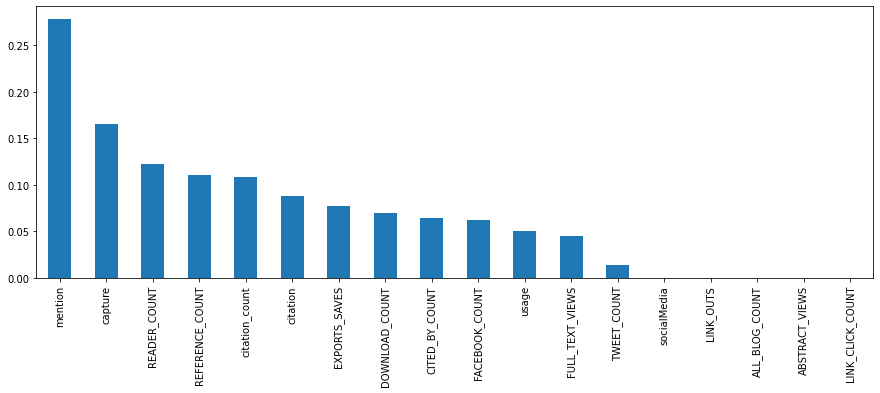

In [46]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [47]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002477FC43950>)

In [48]:
selected_top_columns.get_support()

array([ True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False])

In [49]:

X_train.columns[selected_top_columns.get_support()]

Index(['citation_count', 'EXPORTS_SAVES', 'LINK_OUTS', 'mention'], dtype='object')